# Data Analysis - Flights in the US

In [106]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
import numpy as np # Load the Numpy package/library of numerical methods and call it np for brevity.
import pandas as pd # Load the Pandas package/library of data management methods and call it pd
import matplotlib.pyplot as plt # Load some of the Matplotlib package/library for plotting.

In [108]:
#this csv contains data of different airlines that operated per months from 2005 to 2022.
pwrs = pd.read_csv("Air_Traffic_Passenger_Statistics.csv", encoding='unicode_escape', delimiter=",", dtype=str)

In [109]:
flightData = pd.read_csv("SampleOf2018FlightData.csv")


In [110]:

dep_Delays = flightData['DEP_DELAY']
arrival_Delays = flightData['ARR_DELAY']
print(dep_Delays.head(10))
print(arrival_Delays.head(10))

0     9.0
1    29.0
2    -3.0
3    44.0
4    -4.0
5   -10.0
6    -1.0
7    -6.0
8    -2.0
9   -10.0
Name: DEP_DELAY, dtype: float64
0    44.0
1    53.0
2    -2.0
3    43.0
4    -2.0
5    -7.0
6     5.0
7   -13.0
8    -5.0
9     1.0
Name: ARR_DELAY, dtype: float64


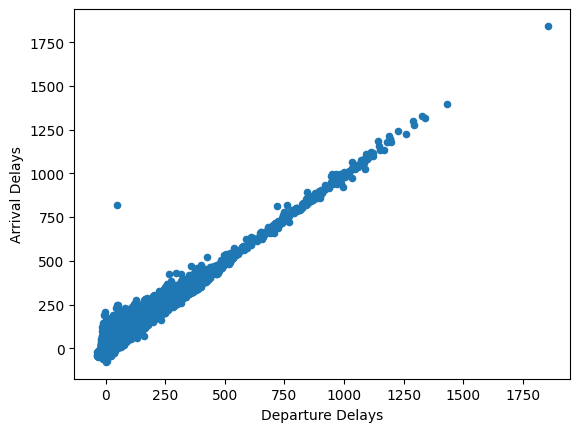

In [111]:

flightData.plot(x='DEP_DELAY', y='ARR_DELAY', kind='scatter')
plt.xlabel('Departure Delays')
plt.ylabel('Arrival Delays')
plt.show()
#Nice line but outliers skew

In [112]:

dep_Delays_under_300 = flightData.loc[flightData['DEP_DELAY'] < 300, 'DEP_DELAY']
arrival_Delays_under_300 = flightData.loc[flightData['DEP_DELAY'] < 300, 'ARR_DELAY']


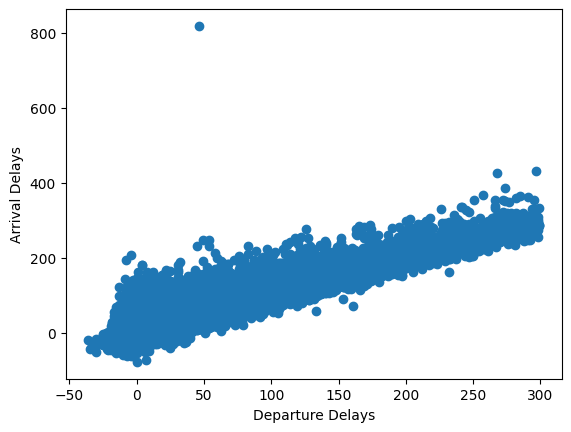

In [113]:

plt.scatter(dep_Delays_under_300, arrival_Delays_under_300)
plt.xlabel('Departure Delays')
plt.ylabel('Arrival Delays')
plt.show()

In [114]:

dep_Delays_under_60 = flightData.loc[flightData['DEP_DELAY'] < 60, 'DEP_DELAY']
arrival_Delays_under_60 = flightData.loc[flightData['DEP_DELAY'] < 60, 'ARR_DELAY']


Text(0, 0.5, 'Arrival Delays')

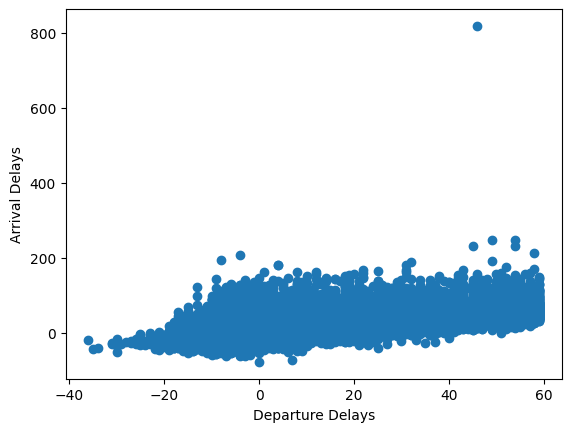

In [115]:
#Only looking at shorter delays
plt.scatter(dep_Delays_under_60, arrival_Delays_under_60)
plt.xlabel('Departure Delays')
plt.ylabel('Arrival Delays')



In [116]:

flightData = pd.read_csv("SampleOf2018FlightData.csv")


In [117]:
grouped_data = flightData.groupby('ORIGIN')['WEATHER_DELAY'].sum()
#grouping by origin aiport and then summing the origin aiports weather delays

In [118]:
top_10_airports = grouped_data.sort_values(ascending=False)[:10]
#sort by descending - highest amount of weather delay to lowest 


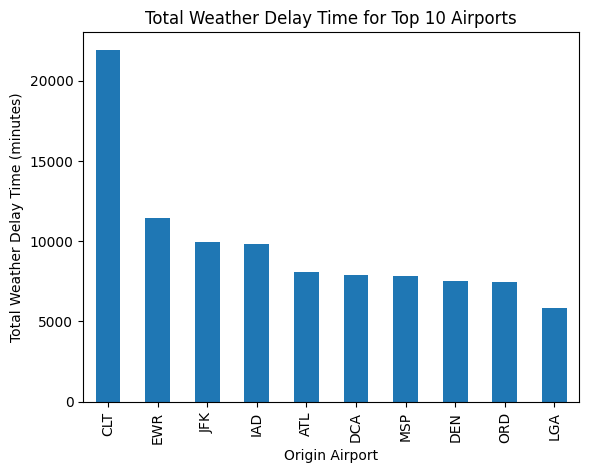

In [119]:
top_10_airports.plot(kind='bar')
plt.xlabel('Origin Airport')
plt.ylabel('Total Weather Delay Time (minutes)')
plt.title('Total Weather Delay Time for Top 10 Airports')
plt.show()
# To consider - amount of total flights from each airport - find avg weather delay per flight per aiport?
#This is only from the sample with august 1st and 2nd, will need to re run for whole month
#All east coast 


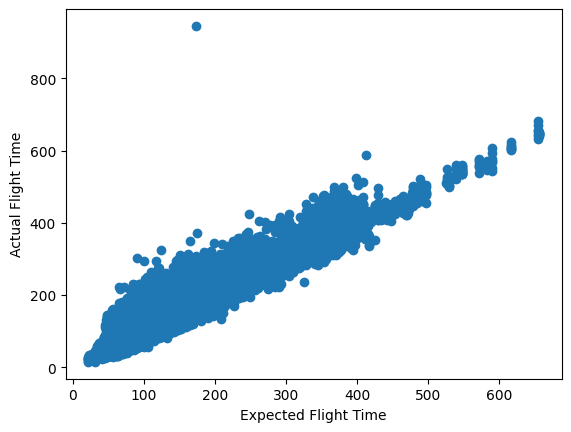

In [120]:

flightData = pd.read_csv('SampleOf2018FlightData.csv')

plt.scatter(flightData['CRS_ELAPSED_TIME'], flightData['ACTUAL_ELAPSED_TIME'])
plt.xlabel('Expected Flight Time')
plt.ylabel('Actual Flight Time')
plt.show()
#obvious correlation but maybe more variance in lower flight times


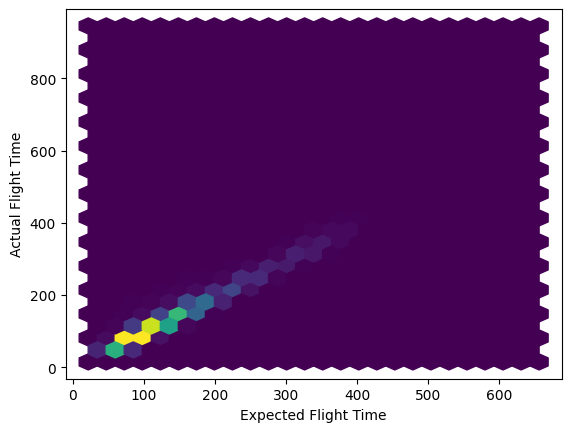

In [121]:

flightData = pd.read_csv('SampleOf2018FlightData.csv')

plt.hexbin(flightData['CRS_ELAPSED_TIME'], flightData['ACTUAL_ELAPSED_TIME'], gridsize=25)
plt.xlabel('Expected Flight Time')
plt.ylabel('Actual Flight Time')
plt.show()

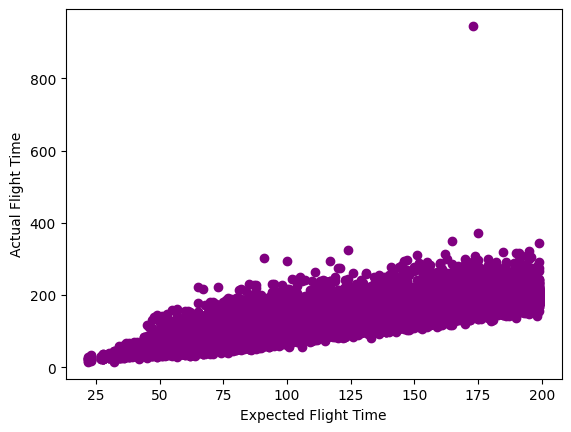

In [122]:
flightData = pd.read_csv('SampleOf2018FlightData.csv')

# filter to flights with CRS elapsed time under 200 minutes
flightData = flightData[flightData['CRS_ELAPSED_TIME'] < 200]

plt.scatter(flightData['CRS_ELAPSED_TIME'], flightData['ACTUAL_ELAPSED_TIME'], c='purple')
plt.xlabel('Expected Flight Time')
plt.ylabel('Actual Flight Time')
plt.show()


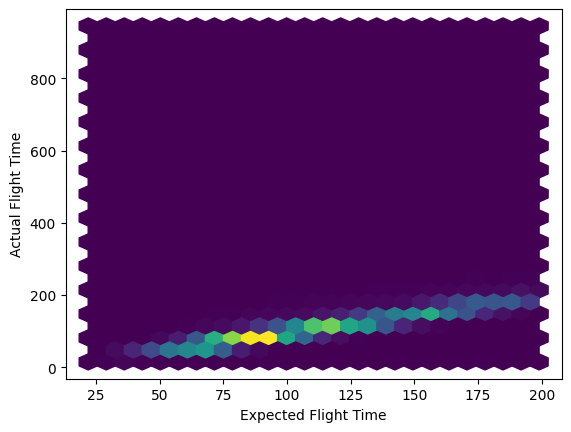

In [123]:
#cols = ['ACTUAL_ELAPSED_TIME', 'CRS_ELAPSED_TIME']
#flightData = pd.read_excel('/Users/eavancassidy/SampleOf2018FlightData.xlsx', sheet_name='Week 1', usecols=cols)

# filter to flights with CRS elapsed time under 200 minutes
flightData = flightData[flightData['CRS_ELAPSED_TIME'] < 200]

#looks cool but think there will be a better way to analyse this data
plt.hexbin(flightData['CRS_ELAPSED_TIME'], flightData['ACTUAL_ELAPSED_TIME'], gridsize=25)
plt.xlabel('Expected Flight Time')
plt.ylabel('Actual Flight Time')
plt.show()


In [124]:

#getting piechart of delays by type
#First by amount of minutes
#getting data
cols = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
flightData = pd.read_csv("SampleOf2018FlightData.csv")


In [125]:

#total delay time for each delay type
delay_data = flightData[cols].sum()

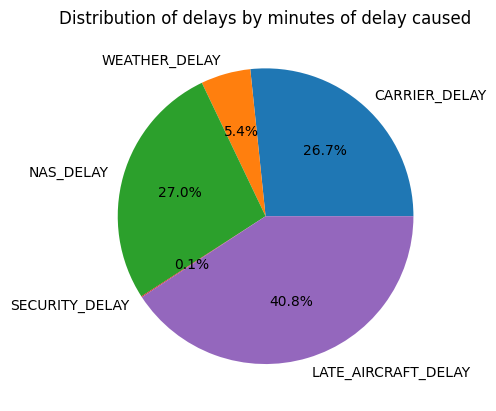

In [126]:

#pie chart of delay type distribution
plt.pie(delay_data, labels=cols, autopct='%1.1f%%')
plt.title('Distribution of delays by minutes of delay caused')
plt.show()


In [127]:
#Getting distribution of delay types by count of delays of each type
#count of delays for each delay type
delay_counts = flightData[cols].gt(0).sum()


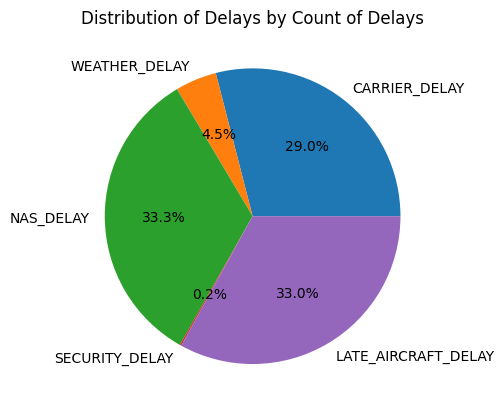

In [128]:

# pie chart of delay type distribution
plt.pie(delay_counts, labels=cols, autopct='%1.1f%%')
plt.title('Distribution of Delays by Count of Delays')
plt.show()

In [129]:

#Getting security delays by aiport (like with weather)
#getting the data
cols = ['ORIGIN', 'SECURITY_DELAY']
flightData = pd.read_csv("SampleOf2018FlightData.csv")


In [130]:

# grouping data by origin airport and sum security delay times
grouped_data = flightData.groupby('ORIGIN')['SECURITY_DELAY'].sum()


In [131]:

# select top 10 airports with most security delays
top_10_airports = grouped_data.sort_values(ascending=False)[:10]


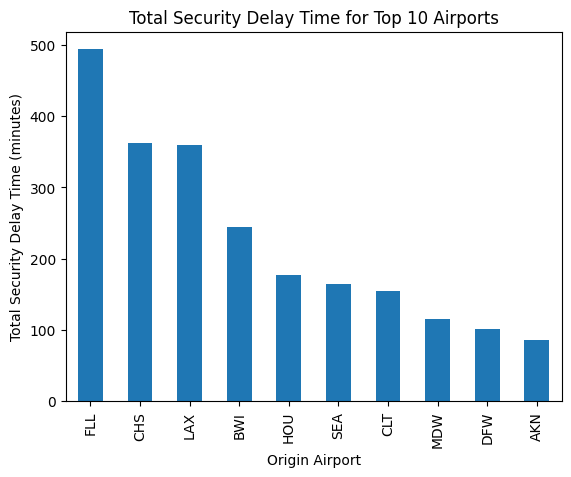

In [132]:

# create bar chart of total security delay time for top 10 airports
top_10_airports.plot(kind='bar')
plt.xlabel('Origin Airport')
plt.ylabel('Total Security Delay Time (minutes)')
plt.title('Total Security Delay Time for Top 10 Airports')
plt.show()


In [133]:

# read flight data and group by carrier ID for carrier delays
cols = ['OP_CARRIER_AIRLINE_ID', 'CARRIER_DELAY']
flightData = pd.read_csv("SampleOf2018FlightData.csv")
grouped_data = flightData.groupby('OP_CARRIER_AIRLINE_ID')['CARRIER_DELAY'].sum()


In [134]:

#Creating dictionary to go from airline id to airline name
airline_names = {
    19393: 'Delta Air Lines',
    19687: 'Southwest Airlines',
    19690: 'Spirit Airlines',
    19790: 'Frontier Airlines',
    19805: 'American Airlines',
    19930: 'United Airlines',
    19977: 'JetBlue Airways',
    20046: 'Alaska Airlines',
    20225: 'Delta Air Lines',
    20237: 'Hawaiian Airlines',
    20263: 'Allegiant Air',
    20304: 'Mesa Airlines',
    20363: 'SkyWest Airlines',
    20366: 'Republic Airways',
    20368: 'Endeavor Air',
    20378: 'ExpressJet Airlines',
    20397: 'GoJet Airlines',
    20398: 'Trans States Airlines',
    20409: 'CommutAir',
    20416: 'PSA Airlines',
    20427: 'Envoy Air',
    20436: 'Piedmont Airlines',
    20445: 'Air Wisconsin Airlines',
    20452: 'Cape Air',
    20500: 'Boutique Air',
    21167: 'Sun Country Airlines'
}



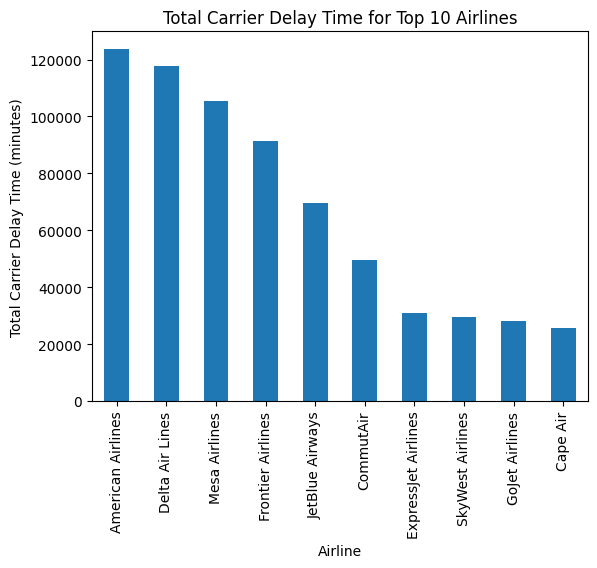

In [135]:

# rename carrier IDs to carrier names and plot top 10
top_10_carriers = grouped_data.nlargest(10)
top_10_carriers.index = top_10_carriers.index.map(airline_names)
top_10_carriers.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Total Carrier Delay Time (minutes)')
plt.title('Total Carrier Delay Time for Top 10 Airlines')
plt.show()


In [136]:

# read flight data and group by carrier ID for late aircraft delays
cols = ['OP_CARRIER_AIRLINE_ID', 'LATE_AIRCRAFT_DELAY']
flightData = pd.read_csv("SampleOf2018FlightData.csv")
grouped_data = flightData.groupby('OP_CARRIER_AIRLINE_ID')['LATE_AIRCRAFT_DELAY'].sum()


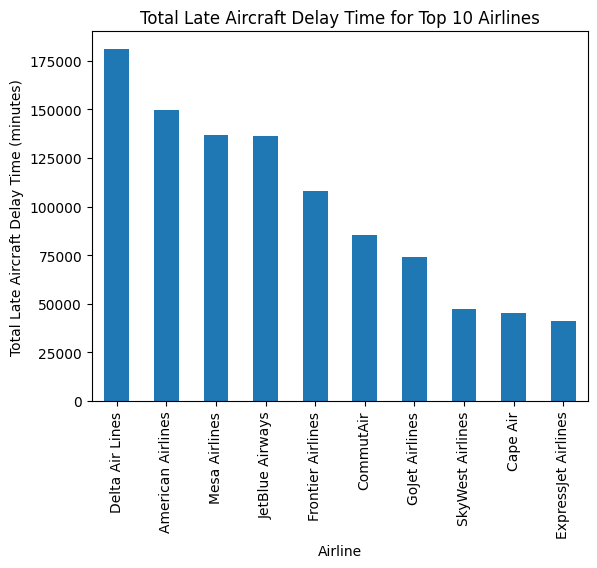

In [137]:

# rename carrier IDs to carrier names and plot top 10
top_10_carriers = grouped_data.nlargest(10)
top_10_carriers.index = top_10_carriers.index.map(airline_names)
top_10_carriers.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Total Late Aircraft Delay Time (minutes)')
plt.title('Total Late Aircraft Delay Time for Top 10 Airlines')
plt.show()


In [138]:

#Heat map for minutes of delays by route
# set threshold for minimum number of flights per route
#Have it as 150 through trial and error 
#from a dataset of ~160,000 flights
threshold = 150

# filter data to only include routes with more than the threshold number of flights
cols = ['ORIGIN', 'DEST', 'ARR_DELAY']
flightData = pd.read_csv("SampleOf2018FlightData.csv")
sortedData = flightData.groupby(["ORIGIN", "DEST"]).filter(lambda x: len(x) > threshold)


In [139]:

# group data by origin and destination airport and sum the delays
pivotSortedData = sortedData.groupby(['ORIGIN', 'DEST'])["ARR_DELAY"].sum().unstack(fill_value=0)



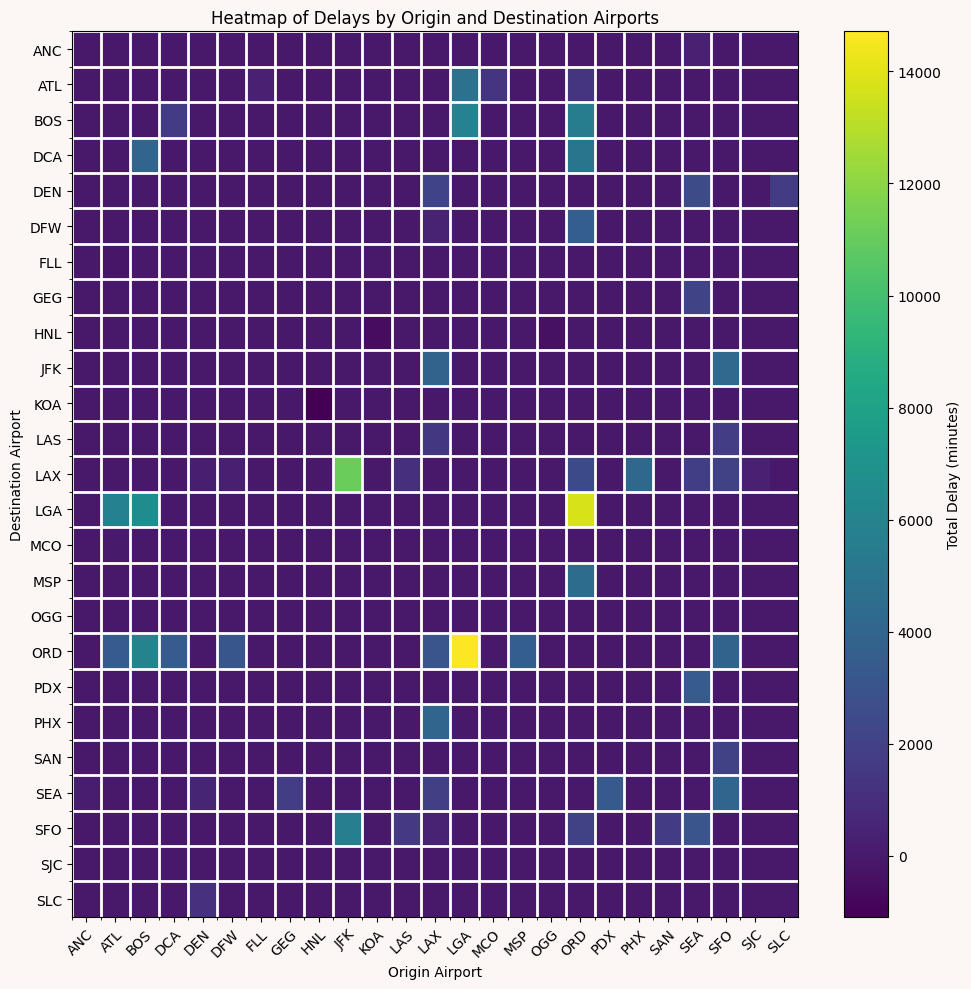

In [140]:

# create the heatmap
fig1, ax1 = plt.subplots(figsize=(10,10), facecolor="#FCF6F5FF")
im = ax1.imshow(pivotSortedData, cmap="viridis", aspect="auto")

# set x and y tick labels
ax1.set_xticks(np.arange(len(pivotSortedData.columns)))
ax1.set_yticks(np.arange(len(pivotSortedData.index)))
ax1.set_xticks(np.arange(-.5, 23, 1), minor=True)
ax1.set_yticks(np.arange(-.5, 24, 1), minor=True)
ax1.set_xticklabels(pivotSortedData.columns)
ax1.set_yticklabels(pivotSortedData.index)

# add grid lines
ax1.grid(which="minor", color="w", linestyle="-", linewidth=2)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# set x and y axis labels
ax1.set_xlabel("Origin Airport")
ax1.set_ylabel("Destination Airport")

# create colorbar
cbar = fig1.colorbar(im, ax=ax1)
cbar.set_label("Total Delay (minutes)")

# set title and adjust layout
ax1.set_title("Heatmap of Delays by Origin and Destination Airports")
fig1.tight_layout()

In [141]:
print(type(pwrs)) # Find out what kind of object it is.

<class 'pandas.core.frame.DataFrame'>


In [142]:
print(pwrs.ndim) # Number of dimensions of data in object

2


In [143]:
print(pwrs.shape) # Number of items along each dimension in (row, column) order

(50730, 12)


In [144]:
#We can see that there are 50730 rows and 12 columns

In [145]:
print(pwrs.size) # Total number of items, i.e. row number x col number.

608760


In [146]:
print(pwrs.head(20)) # Show the first few and last few rows of the DataFrame, with row indices

   Activity Period Operating Airline Operating Airline IATA Code  \
0           200507      ATA Airlines                          TZ   
1           200507      ATA Airlines                          TZ   
2           200507      ATA Airlines                          TZ   
3           200507        Air Canada                          AC   
4           200507        Air Canada                          AC   
5           200507         Air China                          CA   
6           200507         Air China                          CA   
7           200507        Air France                          AF   
8           200507        Air France                          AF   
9           200507   Air New Zealand                          NZ   
10          200507   Air New Zealand                          NZ   
11          200507   AirTran Airways                          FL   
12          200507   AirTran Airways                          FL   
13          200507   Alaska Airlines            

In [147]:
print(pwrs.tail(20)) # Show the last few rows of the DataFrame, with row indices

      Activity Period     Operating Airline Operating Airline IATA Code  \
50710          202212       United Airlines                          UA   
50711          202212       United Airlines                          UA   
50712          202212       United Airlines                          UA   
50713          202212       United Airlines                          UA   
50714          202212       United Airlines                          UA   
50715          202212       United Airlines                          UA   
50716          202212       United Airlines                          UA   
50717          202212       United Airlines                          UA   
50718          202212       United Airlines                          UA   
50719          202212       United Airlines                          UA   
50720          202212       United Airlines                          UA   
50721          202212       United Airlines                          UA   
50722          202212    

In [148]:
print(pwrs.iloc[0]) # Example of the first row

Activity Period                      200507
Operating Airline              ATA Airlines
Operating Airline IATA Code              TZ
Published Airline              ATA Airlines
Published Airline IATA Code              TZ
GEO Summary                        Domestic
GEO Region                               US
Activity Type Code                 Deplaned
Price Category Code                Low Fare
Terminal                         Terminal 1
Boarding Area                             B
Passenger Count                       27271
Name: 0, dtype: object


In [149]:
pwrs_e = pwrs.iloc[0:608760,11] #I pick the passenger count

In [150]:
print(pwrs_e)

0        27271
1        29131
2         5415
3        35156
4        34090
         ...  
50725     3197
50726     5836
50727     6650
50728     1679
50729     1857
Name: Passenger Count, Length: 50730, dtype: object


In [151]:
pwrs_ea = np.array(pwrs_e) # Convert into from unusual DataFrame object to more conventional Numpy array object

In [152]:
pwrs_eai = pwrs_e.astype(int) # Cast from string to int. 

In [153]:
print(pwrs_eai) 

0        27271
1        29131
2         5415
3        35156
4        34090
         ...  
50725     3197
50726     5836
50727     6650
50728     1679
50729     1857
Name: Passenger Count, Length: 50730, dtype: int32


In [222]:
print('Max of Passenger Count', np.amax(pwrs_eai))
print('Min of Passenger Count', np.amin(pwrs_eai))

Max of Passenger Count 659837
Min of Passenger Count 1


In [223]:
print('Mean Passenger Count', np.mean(pwrs_eai))
print('Std. dev. of Passenger Count', np.std(pwrs_eai))

Mean Passenger Count 28489.836073329392
Std. dev. of Passenger Count 60099.556006949846


In [156]:
#Sow all airlines
from collections import OrderedDict
list(OrderedDict.fromkeys(pwrs['Operating Airline']))

['ATA Airlines',
 'Air Canada',
 'Air China',
 'Air France',
 'Air New Zealand',
 'AirTran Airways',
 'Alaska Airlines',
 'All Nippon Airways',
 'American Airlines',
 'American Eagle Airlines',
 'Asiana Airlines',
 'Atlantic Southeast Airlines',
 'BelAir Airlines',
 'British Airways',
 'Cathay Pacific',
 'China Airlines',
 'Delta Air Lines',
 'EVA Airways',
 'Frontier Airlines',
 'Hawaiian Airlines',
 'Horizon Air',
 'Icelandair (Inactive)',
 'Independence Air',
 'Japan Airlines',
 'KLM Royal Dutch Airlines',
 'Korean Air Lines',
 'Lufthansa German Airlines',
 'Mesa Airlines',
 'Mexicana Airlines',
 'Midwest Airlines',
 'Northwest Airlines (became Delta)',
 'Philippine Airlines',
 'Singapore Airlines',
 'SkyWest Airlines',
 'Sun Country Airlines',
 'TACA International Airlines, S.A.',
 'US Airways',
 'United Airlines',
 'United Airlines - Pre 07/01/2013',
 'Virgin Atlantic',
 'WestJet Airlines',
 'Boeing Company',
 'Miami Air International',
 'Air Canada Jazz',
 'Qantas Airways',
 'Ame

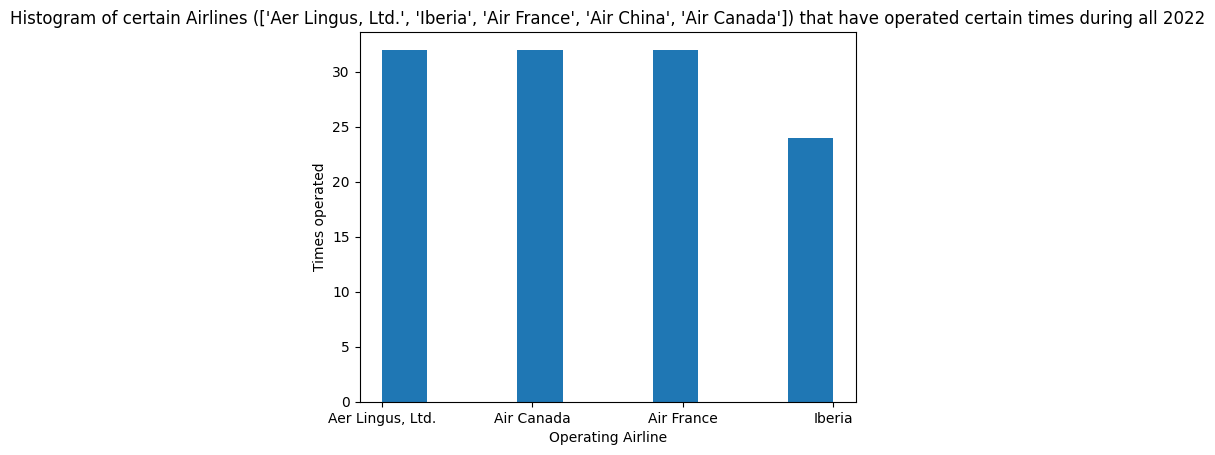

In [157]:
airlines_subset = ['Aer Lingus, Ltd.', 'Iberia', 'Air France', 'Air China', 'Air Canada']

filtered_pwrs = pwrs[(pwrs['Operating Airline'].isin(airlines_subset)) & (pwrs['Activity Period'] > '202201')]

plt.hist(filtered_pwrs['Operating Airline'], bins=10)
plt.xlabel('Operating Airline')
plt.ylabel('Times operated')
plt.title('Histogram of certain Airlines ({}) that have operated certain times during all 2022'.format(airlines_subset))
plt.show()


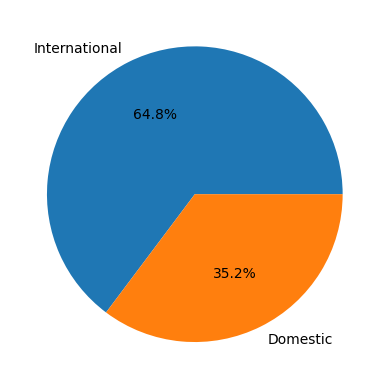

In [158]:
y = np.array(pwrs['GEO Summary'].value_counts(), pwrs['GEO Summary'].value_counts())
mylabels = ["International", "Domestic"]

plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show()

#Here we can see that there are more international flights than domestic ones

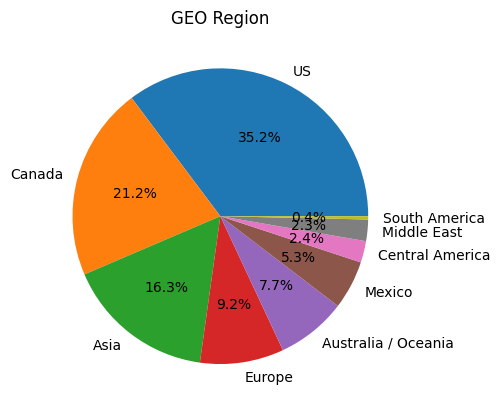

In [159]:
y = np.array(pwrs['GEO Region'].value_counts())

l = list(OrderedDict.fromkeys(pwrs['GEO Region']))

plt.pie(y, labels = l, autopct='%1.1f%%')
plt.title("GEO Region")
plt.show()

#This is the destination of each flight. As we can see, there are lots of flights flying to the US, Canada, Asia and Europe.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
data = pd.read_csv("WorkingFlights.csv")

In [162]:
data.head

<bound method NDFrame.head of       YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0     2015      1    1            4      AS             98      N407AS   
1     2015      1    1            4      AA           2336      N3KUAA   
2     2015      1    1            4      US            840      N171US   
3     2015      1    1            4      AA            258      N3HYAA   
4     2015      1    1            4      AS            135      N527AS   
...    ...    ...  ...          ...     ...            ...         ...   
9995  2015      1    1            4      HA            165      N492HA   
9996  2015      1    1            4      MQ           3046      N610MQ   
9997  2015      1    1            4      MQ           3048      N679MQ   
9998  2015      1    1            4      MQ           3118      N512MQ   
9999  2015      1    1            4      MQ           3428      N516MQ   

     ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0           

In [163]:
 print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [164]:
print(data.ndim) #Number of dimensions of data in object
print(data.shape) #31 Columns, 1999 rows
print(data.size) #Total amount of information
print(data.iloc[100,8])
print(type(data.iloc[100,8]))

2
(10000, 31)
310000
DTW
<class 'str'>


In [165]:
taxiOut = data.iloc[1:10000, 12]
taxiIn = data.iloc[1:1999, 19]
originAirport = data.iloc[1:10000, 7]
destinationAirport = data.iloc[1:1999, 8]
print(taxiOut)
print(taxiIn)
print(originAirport)
print(destinationAirport)

1       12.0
2       16.0
3       15.0
4       11.0
5       18.0
        ... 
9995     7.0
9996     5.0
9997    20.0
9998    10.0
9999    22.0
Name: TAXI_OUT, Length: 9999, dtype: float64
1        4.0
2       11.0
3        8.0
4        5.0
5        6.0
        ... 
1994    15.0
1995     9.0
1996     4.0
1997     6.0
1998     2.0
Name: TAXI_IN, Length: 1998, dtype: float64
1       LAX
2       SFO
3       LAX
4       SEA
5       SFO
       ... 
9995    OGG
9996    DBQ
9997    ORD
9998    MDT
9999    DFW
Name: ORIGIN_AIRPORT, Length: 9999, dtype: object
1       PBI
2       CLT
3       MIA
4       ANC
5       MSP
       ... 
1994    DEN
1995    DEN
1996    SNA
1997    BOS
1998    HOU
Name: DESTINATION_AIRPORT, Length: 1998, dtype: object


In [166]:
taxiOutArray = np.array(taxiOut)
taxiInArray = np.array(taxiIn)
originAirportArray = np.array(originAirport)
destinationAirportArray = np.array(destinationAirport)
print(np.ndim(taxiOutArray))
print(np.ndim(taxiInArray))
print(np.ndim(originAirport))
print(np.ndim(destinationAirport))

1
1
1
1


In [167]:
print(taxiOutArray)
print(taxiInArray)
print(originAirportArray)
print(destinationAirportArray)

[12. 16. 15. ... 20. 10. 22.]
[ 4. 11.  8. ...  4.  6.  2.]
['LAX' 'SFO' 'LAX' ... 'ORD' 'MDT' 'DFW']
['PBI' 'CLT' 'MIA' ... 'SNA' 'BOS' 'HOU']


In [168]:
taxiInFloat = taxiInArray.astype(float)
taxiOutFloat = taxiOutArray.astype(float)
originAirportStr = originAirportArray.astype(str)
destinationAirportStr = destinationAirportArray.astype(str)
print(taxiInFloat)
print(taxiOutFloat)
print(originAirportStr)
print(destinationAirportStr)



[ 4. 11.  8. ...  4.  6.  2.]
[12. 16. 15. ... 20. 10. 22.]
['LAX' 'SFO' 'LAX' ... 'ORD' 'MDT' 'DFW']
['PBI' 'CLT' 'MIA' ... 'SNA' 'BOS' 'HOU']


In [169]:
print("Maximum of Taxi In Time: ", np.nanmax(taxiInFloat))
print("Minimum of Taxi In Time: ", np.nanmin(taxiInFloat))

Maximum of Taxi In Time:  80.0
Minimum of Taxi In Time:  1.0


In [170]:
print("Maximum of Taxi Out Time: ", np.nanmax(taxiOutFloat))
print("Minimum of Taxi Out Time: ", np.nanmin(taxiOutFloat))

Maximum of Taxi Out Time:  113.0
Minimum of Taxi Out Time:  3.0


In [171]:
maxTaxiOut = data.loc[data['TAXI_OUT'].idxmax()]

In [172]:
airportMaxTaxiOut = maxTaxiOut['ORIGIN_AIRPORT']

In [173]:
print("Airport with the longest Taxi Out Time: ",airportMaxTaxiOut)

Airport with the longest Taxi Out Time:  DEN


In [174]:
minTaxiOut = data.loc[data['TAXI_OUT'].idxmin()]

In [175]:
airportMinTaxiOut = minTaxiOut['ORIGIN_AIRPORT']

In [176]:
print("Airport with the shortest Taxi Out Time: ",airportMinTaxiOut)

Airport with the shortest Taxi Out Time:  MLU


In [177]:
maxTaxiIn = data.loc[data['TAXI_IN'].idxmax()]

In [178]:
airportMaxTaxiIn = maxTaxiIn['DESTINATION_AIRPORT']

In [179]:
print("Airport with the longest Taxi In Time: ",airportMaxTaxiIn)

Airport with the longest Taxi In Time:  LGA


In [180]:
minTaxiIn = data.loc[data['TAXI_IN'].idxmin()]

In [181]:
airportMinTaxiIn = minTaxiIn['DESTINATION_AIRPORT']

In [182]:
print("Airport with the shortest Taxi In Time: ",airportMinTaxiIn)

Airport with the shortest Taxi In Time:  HOU


In [183]:
airportsData1 = data.iloc[1:10000, 7:8]
airportsData1Counts = airportsData1.value_counts()
print(airportsData1Counts[0:20])
airportsData2 = data.iloc[1:10000, 8:9]
airportsData2Counts = airportsData2.value_counts()
print(airportsData2Counts[0:20])

ORIGIN_AIRPORT
DFW               545
ATL               479
ORD               455
LAX               384
DEN               384
SFO               303
IAH               290
PHX               285
LAS               250
MCO               228
SEA               201
MSP               199
SLC               193
JFK               186
BOS               179
EWR               178
CLT               172
DTW               170
LGA               169
FLL               159
dtype: int64
DESTINATION_AIRPORT
DFW                    620
ATL                    586
ORD                    523
DEN                    436
LAX                    368
IAH                    344
PHX                    304
SFO                    281
MCO                    232
LAS                    231
CLT                    217
JFK                    201
EWR                    199
SLC                    188
MSP                    185
SEA                    182
LGA                    179
DTW                    170
MIA                    164

In [184]:
print("We will now plot the average Taxi Out time for a variety of airports, including the airports with the max and min taxi out time.")

We will now plot the average Taxi Out time for a variety of airports, including the airports with the max and min taxi out time.


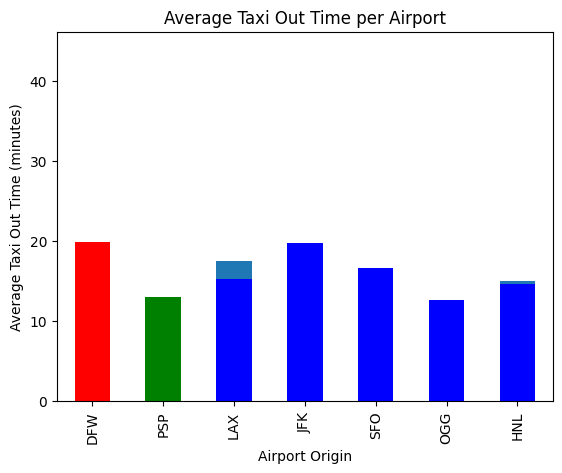

In [185]:
grouped1 = data.groupby('ORIGIN_AIRPORT')['TAXI_OUT'].mean()

# Create a bar chart of the average taxi out time per airport
grouped1.plot(kind='bar')

filtered1 = grouped1.loc[['DFW','PSP','LAX', 'JFK','SFO','OGG','HNL']]
#I will colour the airports with minimum times green and maximum time red
colours = ['red','green','blue','blue','blue','blue','blue']

# Create a bar chart of the filtered data
filtered1.plot(kind='bar', color = colours)

# Add labels and title to the chart
plt.xlabel('Airport Origin')
plt.ylabel('Average Taxi Out Time (minutes)')
plt.title('Average Taxi Out Time per Airport')

# Show the chart
plt.show()

In [186]:
print("DFW (Dallas Fort Worth, Texas) has the longest average taxi out time. It is one of the busiest airports and the most popular for outbound flights.") 

DFW (Dallas Fort Worth, Texas) has the longest average taxi out time. It is one of the busiest airports and the most popular for outbound flights.


In [187]:
print("PSP (Palm Springs International Airport, California) has the shortest taxi out time. It has substantially less outbound flights than DFW.") 

PSP (Palm Springs International Airport, California) has the shortest taxi out time. It has substantially less outbound flights than DFW.


We will look at an airport that is busy for outbound flights


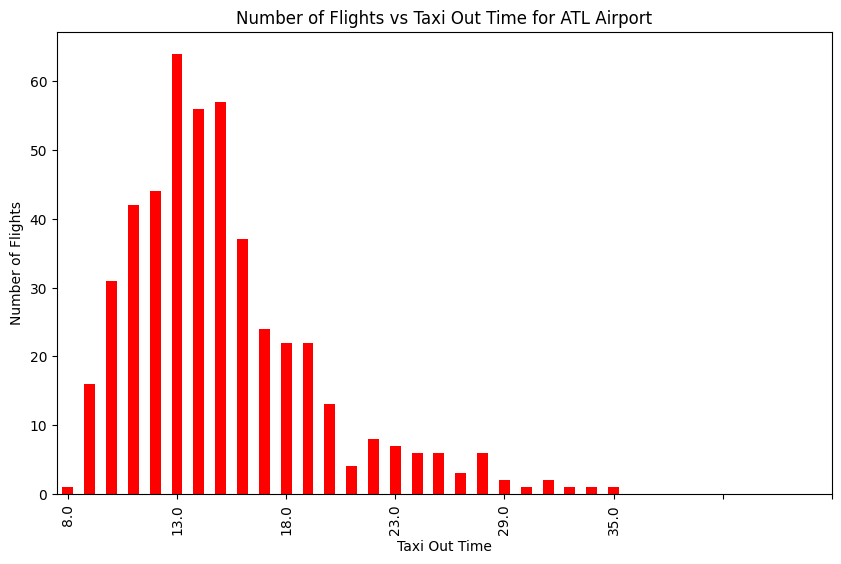

In [188]:
print("We will look at an airport that is busy for outbound flights") 
# Filter the data for flights departing from ATL
atl_data = data[data['ORIGIN_AIRPORT'] == 'ATL']

# Group the data by taxi out time and count the number of flights per time
grouped_data = atl_data.groupby('TAXI_OUT')['FLIGHT_NUMBER'].count()

# Plot the data
grouped_data.plot(kind='bar', figsize=(10,6), color = 'red')
plt.xlabel('Taxi Out Time')
plt.ylabel('Number of Flights')
plt.title('Number of Flights vs Taxi Out Time for ATL Airport')
plt.xticks(range(0, int(grouped_data.index.max())+5, 5))
plt.show()

We will repeat this for a less busy airport for outbound flights, CHS.


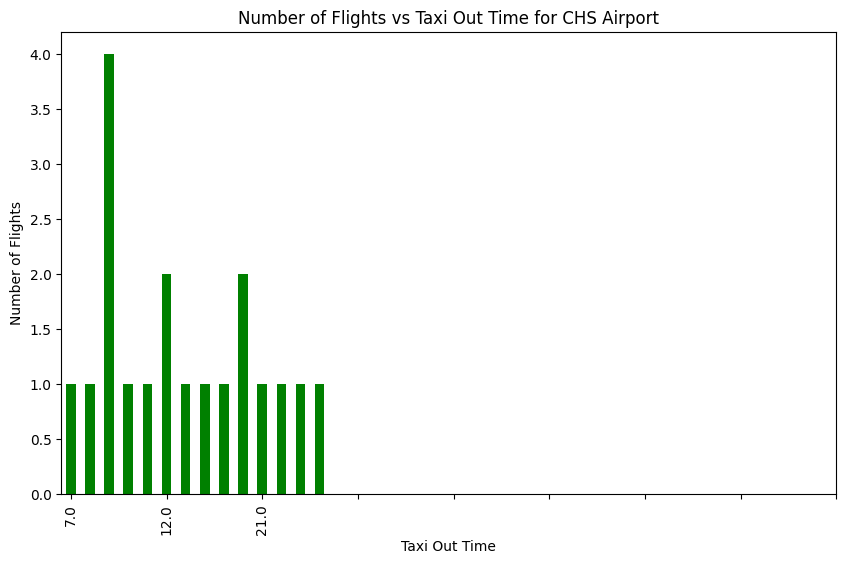

In [189]:
print("We will repeat this for a less busy airport for outbound flights, CHS.")
# Filter the data for flights departing from CHS
chs_data = data[data['ORIGIN_AIRPORT'] == 'CHS']

# Group the data by taxi out time and count the number of flights per time
grouped_data = chs_data.groupby('TAXI_OUT')['FLIGHT_NUMBER'].count()

# Plot the data
grouped_data.plot(kind='bar', figsize=(10,6), color = 'green')
plt.xlabel('Taxi Out Time')
plt.ylabel('Number of Flights')
plt.title('Number of Flights vs Taxi Out Time for CHS Airport')
plt.xticks(range(0, int(grouped_data.index.max())+5, 5))
plt.show()

In [190]:
print("Comparing a busy and deserted airport for outbound flights, it is clear to see the busy airport has a higher average taxi out time (in the case of ATL about 14 minutes) and the quieter airport has a shorter taxi time (in the case of CHS abount 10 minutes).") 

Comparing a busy and deserted airport for outbound flights, it is clear to see the busy airport has a higher average taxi out time (in the case of ATL about 14 minutes) and the quieter airport has a shorter taxi time (in the case of CHS abount 10 minutes).


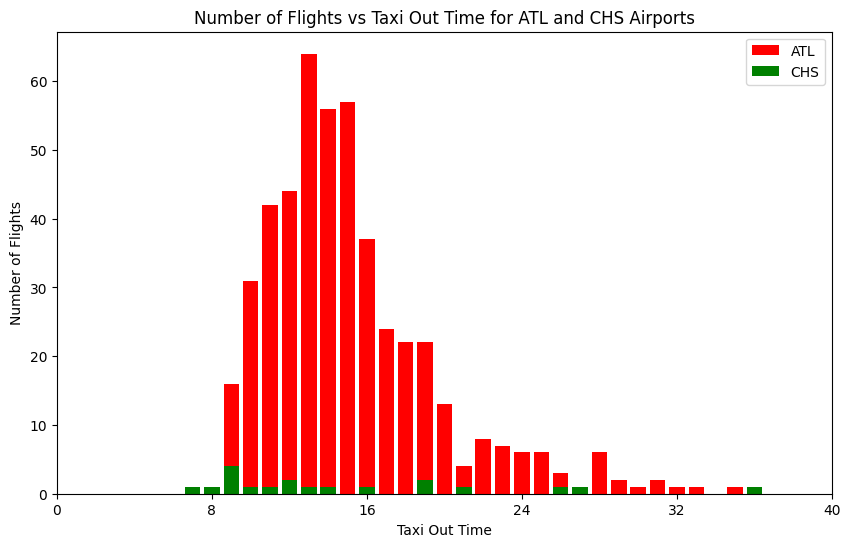

In [191]:
# Filter the data for flights departing from ATL
atl_data = data[data['ORIGIN_AIRPORT'] == 'ATL']

# Filter the data for flights departing from CHS
chs_data = data[data['ORIGIN_AIRPORT'] == 'CHS']

# Group the data by taxi out time and count the number of flights per time for ATL and CHS
atl_grouped_data = atl_data.groupby('TAXI_OUT')['FLIGHT_NUMBER'].count()
chs_grouped_data = chs_data.groupby('TAXI_OUT')['FLIGHT_NUMBER'].count()

# Plot the data
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(atl_grouped_data.index, atl_grouped_data.values, label='ATL', color = 'red')
ax.bar(chs_grouped_data.index, chs_grouped_data.values, color='green', label='CHS')
ax.set_xlabel('Taxi Out Time')
ax.set_ylabel('Number of Flights')
ax.set_title('Number of Flights vs Taxi Out Time for ATL and CHS Airports')
ax.set_xticks(range(0, int(atl_grouped_data.index.max())+8, 8))
ax.legend()

plt.show()

In [192]:
print("Overall, it appears the more average outbound flights an airport has, the longer the taxi out time. Similarly, airports with fewer outbound flights tend to have a shorter taxi out time. That said, there is not a massive difference between the times. This led us to believe that larger airports (more outbound flights) are more efficient since they have a somewhat similar taxi out time to smaller airports and are able to manage significantly more flights.") 

Overall, it appears the more average outbound flights an airport has, the longer the taxi out time. Similarly, airports with fewer outbound flights tend to have a shorter taxi out time. That said, there is not a massive difference between the times. This led us to believe that larger airports (more outbound flights) are more efficient since they have a somewhat similar taxi out time to smaller airports and are able to manage significantly more flights.


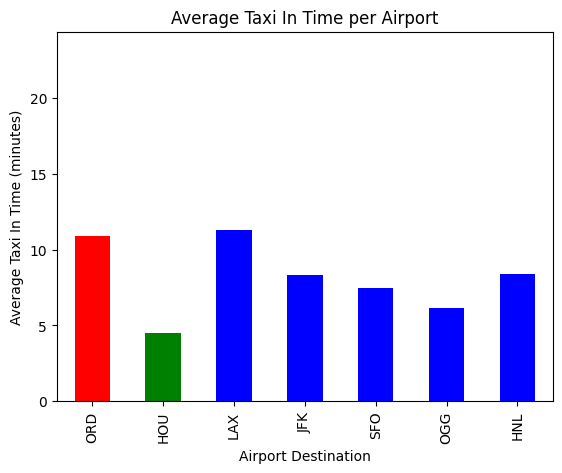

In [193]:
#Let's repeat this for inbound flights to see if a similar conclusion can be drawn. 
grouped2 = data.groupby('DESTINATION_AIRPORT')['TAXI_IN'].mean()

# Create a bar chart of the average taxi out time per airport
grouped2.plot(kind='bar')

filtered2 = grouped2.loc[['ORD','HOU','LAX', 'JFK','SFO','OGG','HNL']]
#I will colour the airports with minimum times green and maximum time red
colours2 = ['red','green','blue','blue','blue','blue','blue']

# Create a bar chart of the filtered data
filtered2.plot(kind='bar', color = colours2)

# Add labels and title to the chart
plt.xlabel('Airport Destination')
plt.ylabel('Average Taxi In Time (minutes)')
plt.title('Average Taxi In Time per Airport')

# Show the chart
plt.show()

In [194]:
print("ORD (O'Hare International Airport, Illinois) has the longest average taxi in time. It is one of the busiest airports and the most popular for inbound flights.")

ORD (O'Hare International Airport, Illinois) has the longest average taxi in time. It is one of the busiest airports and the most popular for inbound flights.


In [195]:
print("HOU (William P. Hobby Airport, Texas) has the shortest average taxi in time. It has few inbound flights comapred to ORD.") 

HOU (William P. Hobby Airport, Texas) has the shortest average taxi in time. It has few inbound flights comapred to ORD.


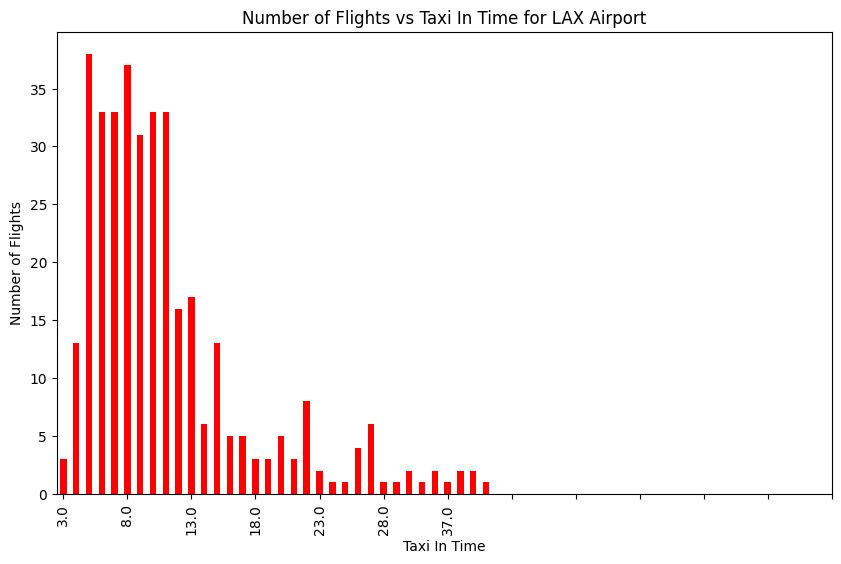

In [196]:
#We will look at an airport that is busy for inbound flights 
# Filter the data for flights departing from LAX
lax_data = data[data['DESTINATION_AIRPORT'] == 'LAX']

# Group the data by taxi out time and count the number of flights per time
grouped_data = lax_data.groupby('TAXI_IN')['FLIGHT_NUMBER'].count()

# Plot the data
grouped_data.plot(kind='bar', figsize=(10,6), color = 'red')
plt.xlabel('Taxi In Time')
plt.ylabel('Number of Flights')
plt.title('Number of Flights vs Taxi In Time for LAX Airport')
plt.xticks(range(0, int(grouped_data.index.max())+5, 5))
plt.show()

We will repeat this for a less busy airport for outbound flights, CHS.


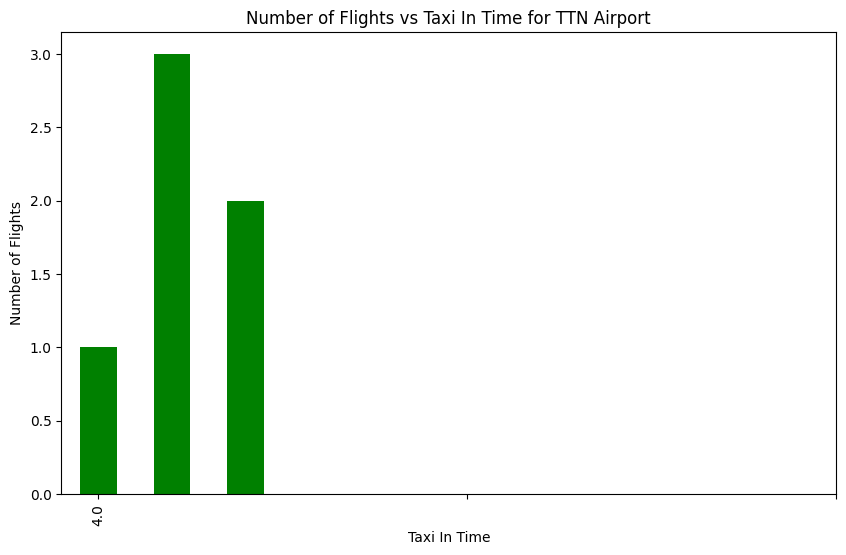

In [197]:
print("We will repeat this for a less busy airport for outbound flights, CHS.")
# Filter the data for flights departing from TTN
ttn_data = data[data['DESTINATION_AIRPORT'] == 'TTN']

# Group the data by taxi out time and count the number of flights per time
grouped_data = ttn_data.groupby('TAXI_IN')['FLIGHT_NUMBER'].count()

# Plot the data
grouped_data.plot(kind='bar', figsize=(10,6), color = 'green')
plt.xlabel('Taxi In Time')
plt.ylabel('Number of Flights')
plt.title('Number of Flights vs Taxi In Time for TTN Airport')
plt.xticks(range(0, int(grouped_data.index.max())+5, 5))
plt.show()

In [198]:
print("Comparing a busy and deserted airport for inbound flights, the busy airport has a higher average taxi in time (in the case of LAX about 8 minutes) and the quieter airport has a shorter taxi time (in the case of TTN abount 5 minutes).") 

Comparing a busy and deserted airport for inbound flights, the busy airport has a higher average taxi in time (in the case of LAX about 8 minutes) and the quieter airport has a shorter taxi time (in the case of TTN abount 5 minutes).


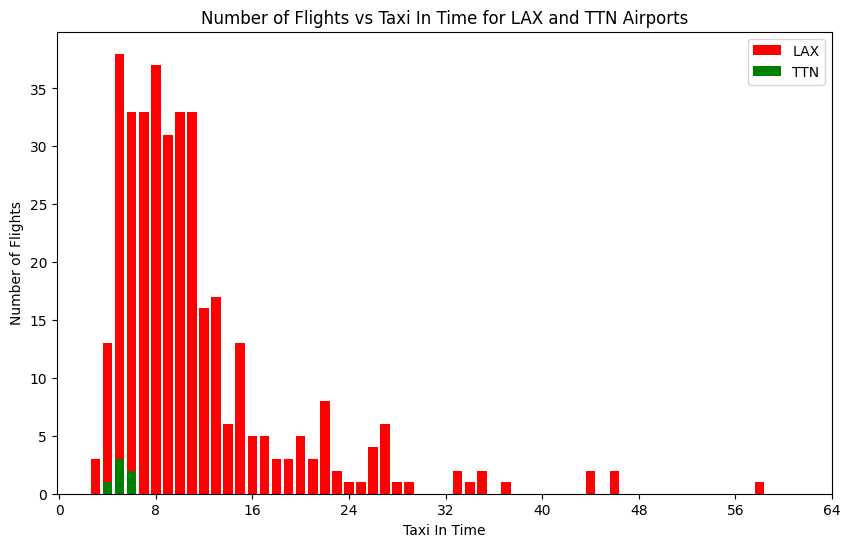

In [199]:
# Filter the data for flights departing from ATL
lax_data = data[data['DESTINATION_AIRPORT'] == 'LAX']

# Filter the data for flights departing from CHS
ttn_data = data[data['DESTINATION_AIRPORT'] == 'TTN']

# Group the data by taxi out time and count the number of flights per time for ATL and CHS
lax_grouped_data = lax_data.groupby('TAXI_IN')['FLIGHT_NUMBER'].count()
ttn_grouped_data = ttn_data.groupby('TAXI_IN')['FLIGHT_NUMBER'].count()

# Plot the data
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(lax_grouped_data.index, lax_grouped_data.values, label='LAX', color = 'red')
ax.bar(ttn_grouped_data.index, ttn_grouped_data.values, color='green', label='TTN')
ax.set_xlabel('Taxi In Time')
ax.set_ylabel('Number of Flights')
ax.set_title('Number of Flights vs Taxi In Time for LAX and TTN Airports')
ax.set_xticks(range(0, int(lax_grouped_data.index.max())+8, 8))
ax.legend()

plt.show()

In [200]:
print("Based on the above graph, we can draw the same conclusion for inbound flights. Airports such as LAX with a large number of inbonud flights have a slightly higher taxi in time than that of smaller, quieter airports such as TTN. This shows how well organised and managed large airports are as they maintain low taxing times while coping with hundreds of flights a day.") 

Based on the above graph, we can draw the same conclusion for inbound flights. Airports such as LAX with a large number of inbonud flights have a slightly higher taxi in time than that of smaller, quieter airports such as TTN. This shows how well organised and managed large airports are as they maintain low taxing times while coping with hundreds of flights a day.


In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap

In [202]:
data = pd.read_csv("WorkingFlights.csv")
airports = pd.read_csv("airports.csv")
airports2 = pd.read_csv("airport_code.csv")

In [203]:
print(data.columns)
print(airports.columns)
print(airports2.columns)


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')
Index(['IATA', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE'], dtype='object')
Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'local_code'],
      dtype='object')


Location of Global and American Airports

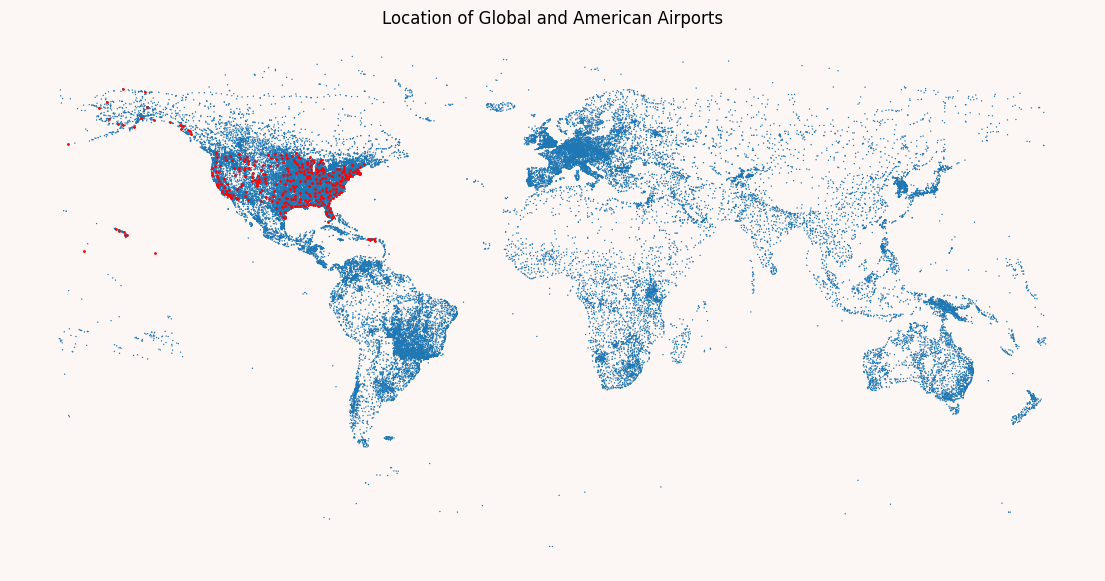

In [204]:
#Density map of global and american airports developed using a scatter plot - it employs (lon, lat) as (x,y) co-ordinates.
#Just thought it was interesting since it turns out to be esssentialy a population density maps of sorts.
#Included in the global airports are small airports and heliports - hence why even in America, the red dots don't account for all airports.
#The red dots are the major airports which will be dealt with in the flight data below.


fig, ax = plt.subplots(facecolor = "#FCF6F5FF")
fig.set_size_inches(14,7)
ax.scatter(airports2["longitude_deg"], airports2["latitude_deg"], s = 1, alpha=1, edgecolors="none")
ax.scatter(airports["LONGITUDE"], airports["LATITUDE"], s=1, alpha=1, edgecolors="red")
ax.axis("off")
ax.set_title("Location of Global and American Airports")

plt.show()

Density of Airports across America 

In [205]:
#Heatmap outlining (on a broader scale), the density and geographic distribution of American airports
#This is an interactive map developed using the folium library.
#Interesting to see coastal dominance of airports and relative lack of airports in the 'great plains' region
#Rerun this block of code in order to reset zoom level for clarity

AmericanMap = folium.Map(location = [38.27312, -98.5821872], zoom_start=5)
airports["LATITUDE"] = airports["LATITUDE"].astype(float)
airports["LONGITUDE"] = airports["LONGITUDE"].astype(float)

airports = airports[["LATITUDE", "LONGITUDE"]]

heatData = [[row["LATITUDE"], row["LONGITUDE"]] for index, row in airports.iterrows()]

HeatMap(heatData).add_to(AmericanMap)
AmericanMap

Infomration outlining the most common flight routes from the data set

In [206]:
#Interesting data surrounding the most common routes outlined in the data set. 
#Curious as to how best to visually present

airportFlightsData = data.iloc[0:10001, 7:9]
airportFlightsDataCount = airportFlightsData.value_counts()
print(airportFlightsDataCount[0:26])

ORIGIN_AIRPORT  DESTINATION_AIRPORT
LAX             JFK                    29
JFK             LAX                    24
SFO             LAX                    23
HNL             OGG                    20
OGG             HNL                    19
LAX             SFO                    19
                LAS                    17
LAS             LAX                    17
MIA             LGA                    17
DFW             ATL                    17
LAS             SFO                    16
SFO             JFK                    16
LAX             ORD                    16
LGA             ORD                    16
PHX             DEN                    16
LAX             HNL                    16
FLL             ATL                    16
LAX             DFW                    15
HNL             KOA                    15
ORD             LAX                    15
DEN             PHX                    15
ORD             LGA                    15
MCO             ATL                    1

Heatmap describing poularity of common routes.

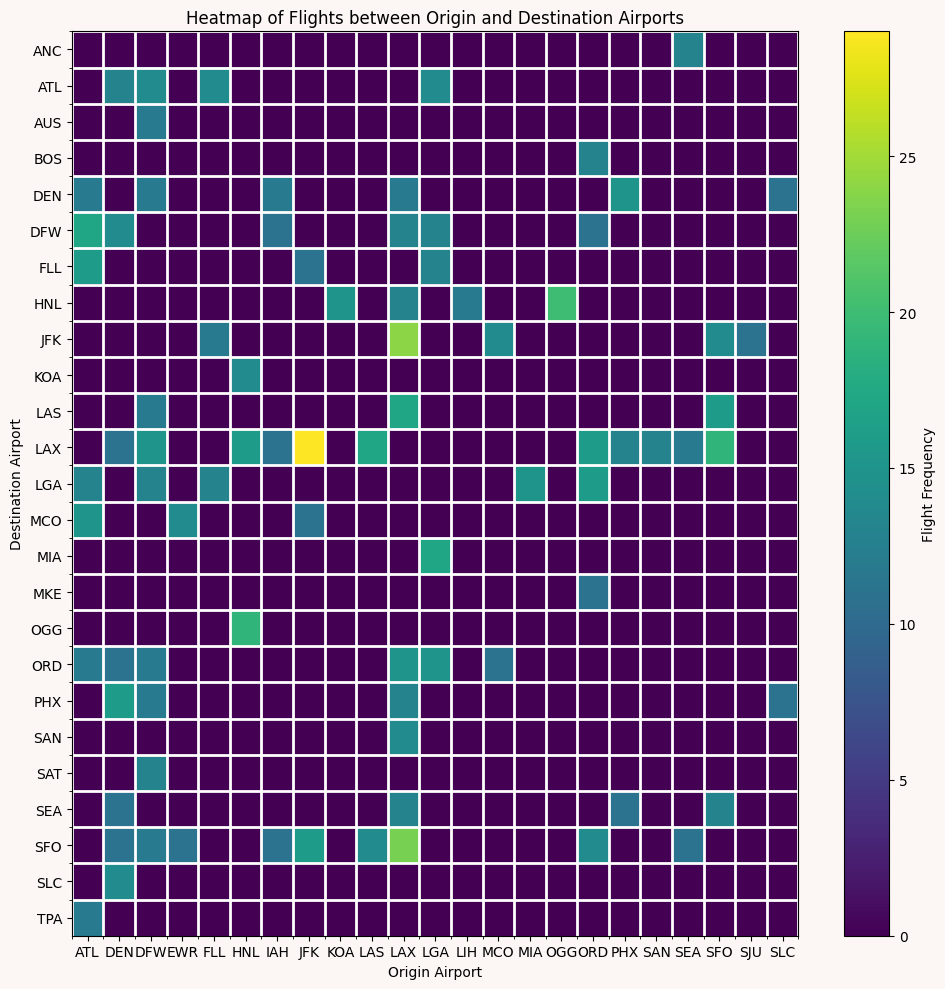

In [207]:
#See attached heatmap visually presenting the popularity of common routes described above. 
#Included in this heatmap are routes in which there are over ten flights. 
#Note that this is drawn from a dataset of almost 10,000 flights.

threshold = 10
sortedData = data.groupby(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]).filter(lambda x: len(x) > threshold)
pivotSortedData = sortedData.groupby(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]).size().unstack(fill_value=0)

fig1, ax1 = plt.subplots(figsize=(10,10), facecolor = "#FCF6F5FF")
im = ax1.imshow(pivotSortedData, cmap="viridis", aspect= "auto")

ax1.set_xticks(np.arange(len(pivotSortedData.columns)))
ax1.set_yticks(np.arange(len(pivotSortedData.index)))
ax1.set_xticks(np.arange(-.5, 23, 1), minor = True)
ax1.set_yticks(np.arange(-.5, 24, 1), minor = True)
ax1.set_xticklabels(pivotSortedData.columns)
ax1.set_yticklabels(pivotSortedData.index)
ax1.grid(which="minor", color = "w", linestyle = "-", linewidth = 2)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")

ax1.set_xlabel("Origin Airport")
ax1.set_ylabel("Destination Airport")

cbar = fig1.colorbar(im, ax = ax1)
cbar.set_label("Flight Frequency")

ax1.set_title("Heatmap of Flights between Origin and Destination Airports")
fig1.tight_layout()

Heatmap describing popularity of all routes

C:\Users\Rory Sexton\AppData\Local\Temp\ipykernel_75892\4024577338.py:25: MatplotlibDeprecationWarning:

The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.

C:\Users\Rory Sexton\AppData\Local\Temp\ipykernel_75892\4024577338.py:31: MatplotlibDeprecationWarning:

The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.



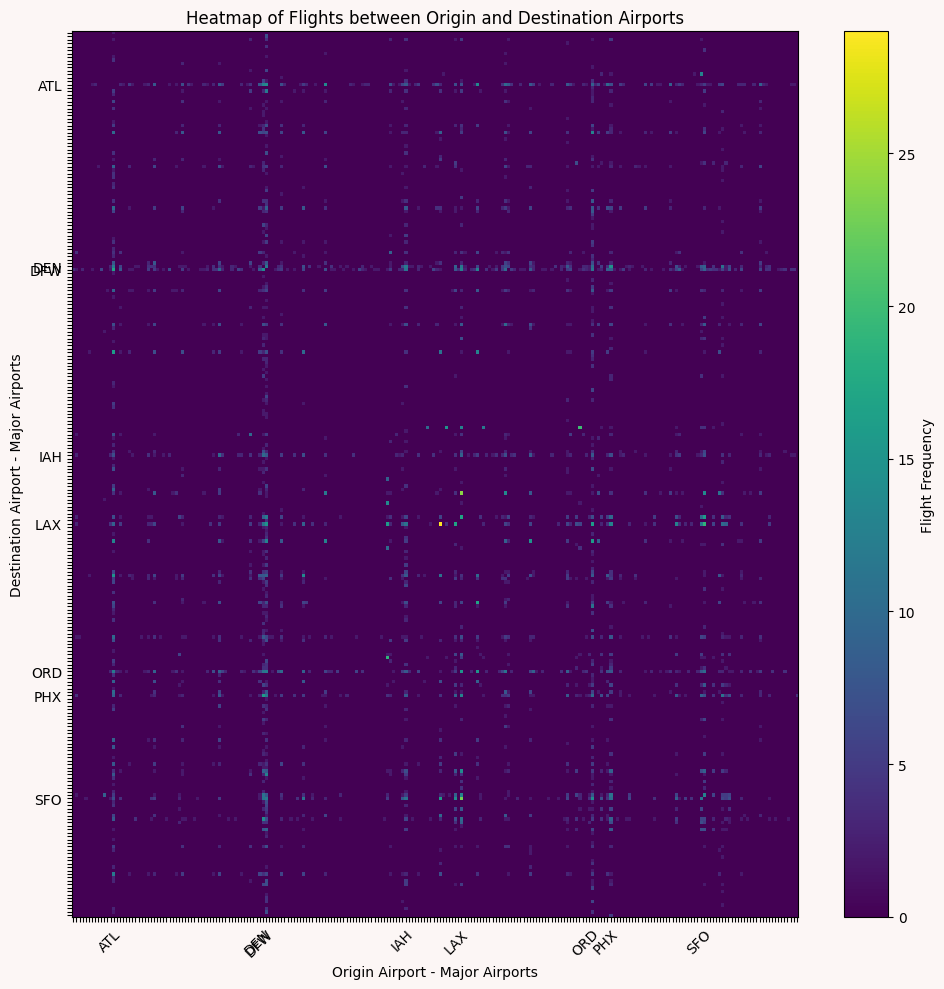

In [208]:
#See attached heatmap visually describing the popularity of all routes. 
#Similar to above heatmap, however, lower threshold value than above.
#Included in this heatmap are all routes encountered within the dataset. 
#Note that this is drawn from a dataset of almost 10,000 flights.
#Please also note that along both the x and y axes DEN (Denver) and DFW (Dallas Fort-Worth) are quite close together. 
#This visulisation is useful at indicating which airports are those which could be considered major hubs.

threshold = 1
sortedData = data.groupby(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]).filter(lambda x: len(x) > threshold)
pivotSortedData = sortedData.groupby(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]).size().unstack(fill_value=0)

fig1, ax1 = plt.subplots(figsize=(10,10), facecolor = "#FCF6F5FF")
im = ax1.imshow(pivotSortedData, cmap="viridis", aspect= "auto")

ax1.set_xticks(np.arange(len(pivotSortedData.columns)))
ax1.set_yticks(np.arange(len(pivotSortedData.index)))
ax1.set_xticklabels(pivotSortedData.columns)
ax1.set_yticklabels(pivotSortedData.index)
ax1.grid(which="minor", color = "w", linestyle = "-", linewidth = 2)
plt.setp(ax1.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")
ax1.set_xlabel("Origin Airport - Major Airports")
ax1.set_ylabel("Destination Airport - Major Airports")

for i, pos in enumerate(ax1.get_xticks()):
    label = ax1.xaxis.get_major_ticks()[i].label
    col_name = pivotSortedData.columns[i]
    if pivotSortedData[col_name].sum() < 250:
        label.set_visible(False)

for i, pos in enumerate(ax1.get_yticks()):
    label = ax1.yaxis.get_major_ticks()[i].label
    row_name = pivotSortedData.index[i]
    if pivotSortedData.loc[row_name].sum() < 250:
        label.set_visible(False)

cbar = fig1.colorbar(im, ax = ax1)
cbar.set_label("Flight Frequency")

ax1.set_title("Heatmap of Flights between Origin and Destination Airports")
fig1.tight_layout()

Most popular airports based on outbound flights

In [209]:
#Drawing data from the original dataset that describes the number of flights out from each airport.
#This data is counted, specifically, the outbound data is used.

airportOriginData = data.iloc[0:10001, 7]
airportOriginDataCounts = pd.value_counts(airportOriginData)

airportDestinationData = data.iloc[0:10001, 8]
airportDestinationDataCounts = pd.value_counts(airportDestinationData)

print(airportOriginDataCounts[0:26])

DFW    545
ATL    479
ORD    455
LAX    384
DEN    384
SFO    303
IAH    290
PHX    285
LAS    250
MCO    228
SEA    201
MSP    199
SLC    193
JFK    186
BOS    179
EWR    178
CLT    172
DTW    170
LGA    169
FLL    159
MIA    141
SAN    138
BWI    135
TPA    133
DCA    122
MDW    116
Name: ORIGIN_AIRPORT, dtype: int64


Airport Size Map based on Outbound Flights

In [210]:
#A visualisation of the above data for the fifteen busiest airports in this data set from this period.
#Note that in this instance, airport size is the amount of outbound flights from the airport in question.

df = pd.DataFrame({
    "IATA": ["DFW","ATL","ORD","LAX","DEN","SFO","IAH","PHX","LAS","MCO","SEA","MSP","SLC","JFK","BOS"],
    "Latitude": [32.89595, 33.64044, 41.9796, 33.94254, 39.85841, 37.619, 29.98047, 33.43417, 36.08036, 28.42889, 47.44898, 44.88055, 40.78839, 40.63975, 42.36435],
    "Longitude": [-97.0372, -97.6699, -87.9045,-118.408, -104.667, -122.375, -95.3397, -112.008, -115.152, -81.316, -122.309, -93.2169, -111.978, -73.7789, -71.0052],
    "Airport Size":[545, 479, 455, 384, 384, 303, 290, 285, 250, 228, 201, 199, 193, 186, 179]
})

fig2 = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", size="Airport Size", hover_name="IATA",
                         color_discrete_sequence=["red"], zoom = 3, height = 600, title="American airport size based on number of outbound flights. Airport size is denoted by size of bubble. Hover for details.")

fig2.update_layout(mapbox_style = "carto-positron")

fig2.show()

In [211]:
import numpy as np # Load the Numpy package/library of numerical methods and call it np for brevity.
import pandas as pd # Load the Pandas package/library of data management methods and call it pd
import matplotlib.pyplot as plt # Load some of the Matplotlib package/library for plotting.

Now, we read the actual data and start working with it.

In [212]:
flights_data = pd.read_csv("us_flights_2015.csv", encoding='unicode_escape', delimiter=",", dtype=str)

We will focus on the airtime of flights with same origin and destination but different airlines, so we gather the relevant data (airline that operated the flight, origin and destination, and airtime).

In [213]:
airlines = flights_data.iloc[0:,4]
origin_airport = flights_data.iloc[0:, 7]
dest_airport = flights_data.iloc[0:, 8]
airtime_data = flights_data.iloc[0:,16]

airlines_array = np.array(airlines)
org_array = np.array(origin_airport)
dst_array = np.array(dest_airport)
airtime_array = np.array(airtime_data)

We create a dictionary data structure that will help us processing the data more easily; for each airline that operated at least one flight in 2015, we associate another dictionary, in which we will associate a specific route to a list that will contain the different air times for multiple flights on this same route.

In [214]:
unique_airlines = set(airlines)
routes_per_airline = dict()
for airline in unique_airlines:
    routes_per_airline[airline] = dict()
print(routes_per_airline)

{'HA': {}, 'WN': {}, 'MQ': {}, 'OO': {}, 'US': {}, 'AS': {}, 'UA': {}, 'VX': {}, 'AA': {}, 'B6': {}, 'EV': {}, 'F9': {}, 'DL': {}, 'NK': {}}


In [215]:
for index, airtime in enumerate(airtime_array):
    try: # this try/except block helps us eliminating rows that do not contain relevant data (ie empty rows or rows with missing data)
        airtime = int(airtime)
    except ValueError:
        continue
    route = org_array[index]+dst_array[index]
    if len(route) != 6: # this condition helps us eliminating routes that do not have a meaning for us (such as routes defined by airport id instead of airport IATA code)
        continue
    if route in routes_per_airline[airlines_array[index]].keys():
        routes_per_airline[airlines_array[index]][route].append(airtime)
    else:
        routes_per_airline[airlines_array[index]][route] = list()
        routes_per_airline[airlines_array[index]][route].append(airtime)

Now that all our data is in place in our data structure, we want to extract the top routes flown by the different airlines, those will be the one with more data to work with.

In [216]:
top_routes_per_airline = dict()
for airline in unique_airlines:
    top_routes_per_airline[airline] = list()
    routes_sorted = sorted(routes_per_airline[airline].items(), key= lambda k: len(k[1]), reverse=True)
    top_routes_per_airline[airline].extend(routes_sorted[:3]) 

To have an overview, we will print out these top routes for a sample of airlines: Delta, American Airlines, United Airlines and JetBlue (the biggest ones).

In [217]:
sample_airlines = ['DL', 'AA', 'UA', 'B6']
top_routes = list()
for airline in sample_airlines:
    print(airline)
    for route, numbers in top_routes_per_airline[airline]:
        print(route)
        top_routes.append(route)
    print()

DL
MCOATL
ATLMCO
LGAATL

AA
DFWLAX
LAXDFW
DFWORD

UA
ORDSFO
SFOORD
EWRSFO

B6
JFKMCO
MCOJFK
BOSDCA



Now let's see the average airtime for some popular routes by the different airlines (some airlines may not fly a specific route, so we could end up having no data for it). JFK-LAX is a known very popular route, so let's see what we have for it.

In [218]:
avg_airtime_jfklax = list()
for airline in sample_airlines:
    avg_airtime_jfklax.append(np.mean(np.array(routes_per_airline[airline]["JFKLAX"])))

Text(0, 0.5, 'Average airtime (min)')

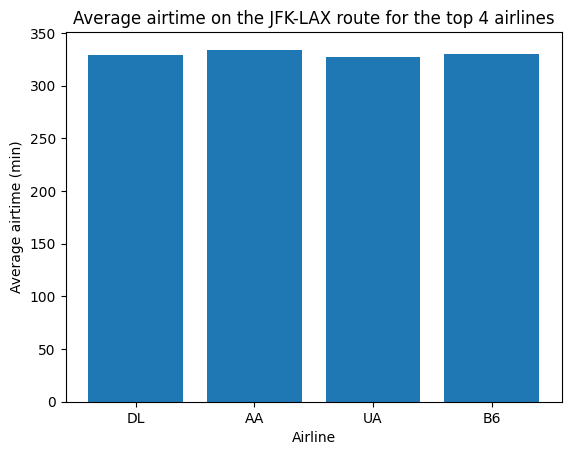

In [219]:
plt.bar(sample_airlines, avg_airtime_jfklax)
plt.title("Average airtime on the JFK-LAX route for the top 4 airlines")
plt.xlabel("Airline")
plt.ylabel("Average airtime (min)")

We see that there is little to no variation between airlines, which seems accurate since flying on a different airline shouldn't mean a flight on the same route should be longer! Let's compare it to the other way (LAX-JFK).

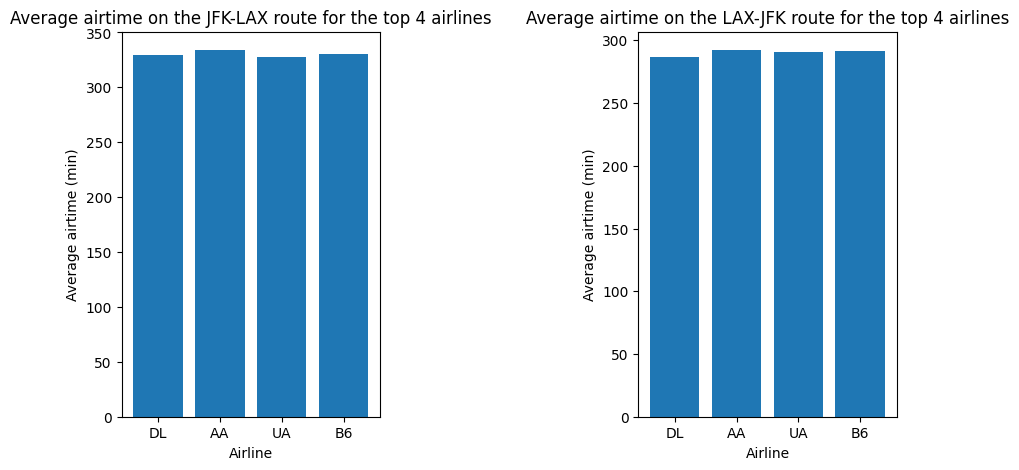

In [220]:
avg_airtime_laxjfk = list()
for airline in sample_airlines:
    avg_airtime_laxjfk.append(np.mean(np.array(routes_per_airline[airline]["LAXJFK"])))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.bar(sample_airlines, avg_airtime_jfklax)
ax1.set_title("Average airtime on the JFK-LAX route for the top 4 airlines")
ax1.set_xlabel("Airline")
ax1.set_ylabel("Average airtime (min)")
ax2.bar(sample_airlines, avg_airtime_laxjfk)
ax2.set_title("Average airtime on the LAX-JFK route for the top 4 airlines")
ax2.set_xlabel("Airline")
ax2.set_ylabel("Average airtime (min)")
fig.subplots_adjust(wspace=1)
plt.show()

We can see that on both ways, all airlines have approximately the same airtime (the variance is so small that it is insignificant). What we can notice though is that it takes less time to fly east that west.

Now let's see the airtime for each major airline's top 3 routes (again, some other airlines may not fly one of these routes, so there will be no data for it).

### In order: Top routes for Delta, American, United and JetBlue

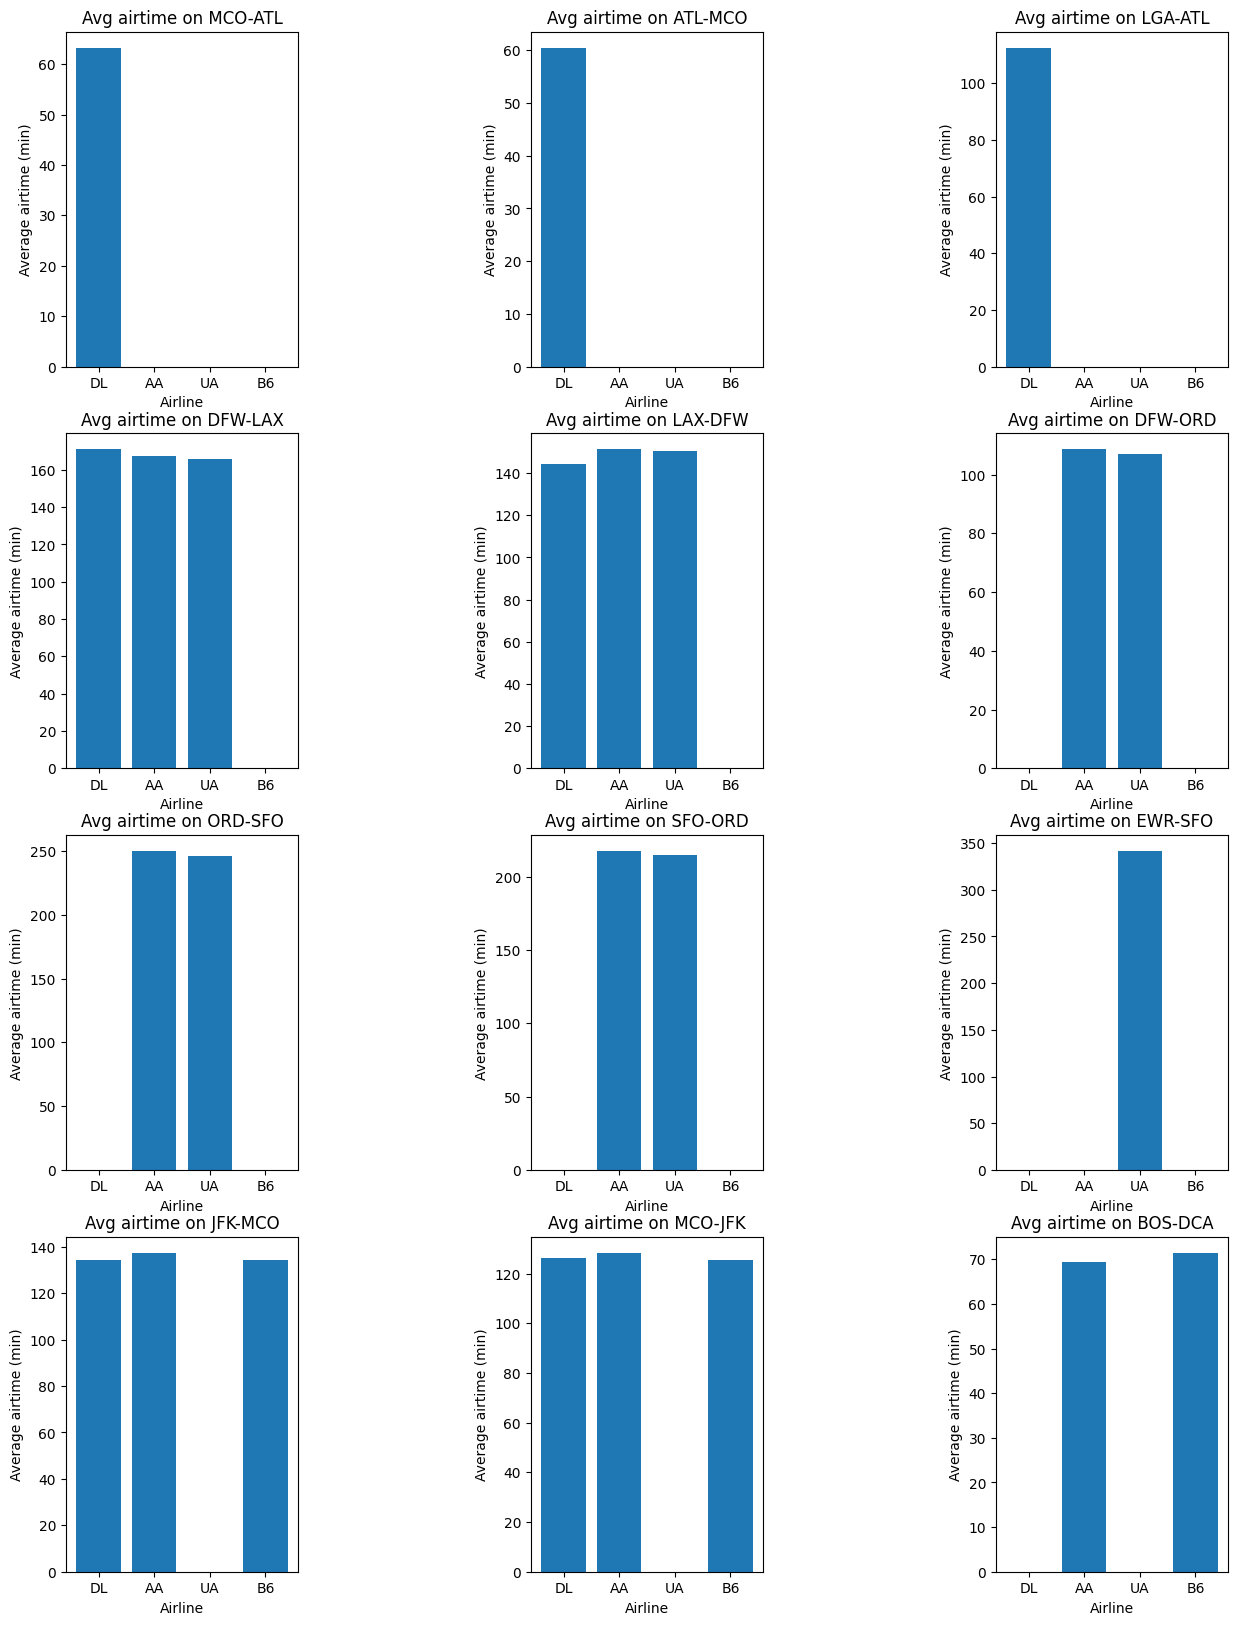

In [221]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
i, j = 0, 0
for route in top_routes:
    avg_airtime = []
    for airline in sample_airlines:
        if route in routes_per_airline[airline].keys(): # if a specific airline doesn't fly a specific route, we pass zero to show there is no data
            avg_airtime.append(np.mean(np.array(routes_per_airline[airline][route])))
        else:
            avg_airtime.append(0)
    axs[i,j].bar(sample_airlines, avg_airtime)
    axs[i,j].set_title(f"Avg airtime on {route[:3]}-{route[3:6]}")
    axs[i,j].set_xlabel("Airline")
    axs[i,j].set_ylabel("Average airtime (min)")
    j += 1
    if j == 3:
        j = 0
        i +=1
fig.subplots_adjust(wspace=1)

Aside from the fact that the data is consistent (airtime is basically the same for multiple other routes), we can see some other useful data here. Most notably, the fact that the top 3 routes flown by Delta were only flown by them in 2015, so they had no competition on those. The airlines who had the most competition on their top flown routes were American and JetBlue, and United had the monopoly on EWR-SFO.